# FcaBmf running over MovieLens 100K Demo

Copyright 2022 Bernardo C. Rodrigues

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public
License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later
version. This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the
implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more
details. You should have received a copy of the GNU General Public License along with this program. If not, 
see <https://www.gnu.org/licenses/>. 

In [1]:
import numpy as np
from surprise import Dataset
from lib.BooleanMatrixBasedRecomenders import FcaBmf, cosine_distance

from rich.jupyter import print

In [2]:
# Create a trainset from the complemte MovieLens 100K dataset
dataset = Dataset.load_builtin("ml-100k")
trainset = dataset.build_full_trainset()

In [3]:
algo = FcaBmf(coverage=1, distance_strategy=cosine_distance, verbose=True)
algo.fit(trainset)

[FcaBmf] Generating binary dataset...
[FcaBmf] Generating binary dataset OK!
[FcaBmf] Resulting binary dataset is 943 rows x 1682 columns
[FcaBmf] Generating Formal Context...
[FcaBmf] Generating Formal Context OK
[FcaBmf] Generating Similarity Matrix...
[FcaBmf] Generating Similarity Matrix Ok


In [4]:
# Access to formal context
print(algo.number_of_factors)
print(algo.formal_context[0])
print(algo.formal_context[1])

1543

Concept(
    extent=[402],
    intent=[
        1,
        2,
        3,
        6,
        7,
        8,
        9,
        13,
        14,
        15,
        16,
        18,
        19,
        20,
        26,
        27,
        29,
        31,
        32,
        33,
        34,
        36,
        37,
        38,
        42,
        44,
        46,
        47,
        50,
        52,
        53,
        54,
        55,
        56,
        57,
        58,
        60,
        61,
        62,
        64,
        65,
        66,
        67,
        70,
        74,
        75,
        76,
        78,
        79,
        80,
        81,
        82,
        84,
        92,
        93,
        94,
        96,
        100,
        101,
        102,
        105,
        108,
        109,
        111,
        112,
        113,
        114,
        118,
        119,
        121,
        122,
        123,
        132,
        134,
        135,
        137,
        138,
        142,
        143,
        145,
        146,
        147,
        152,
        154,
        155,
        156,
        159,
        160,
        161,
        162,
        163,
        164,
        166,
        168,
        169,
        170,
        172,
        179,
        182,
        184,
        185,
        189,
        191,
        192,
        193,
        194,
        195,
        197,
        199,
        200,
        201,
        202,
        203,
        205,
        207,
        208,
        210,
        211,
        212,
        216,
        217,
        218,
        219,
        226,
        227,
        229,
        230,
        231,
        232,
        234,
        235,
        236,
        239,
        240,
        243,
        244,
        247,
        249,
        253,
        254,
        256,
        257,
        258,
        262,
        264,
        271,
        272,
        273,
        275,
        276,
        277,
        282,
        283,
        284,
        285,
        286,
        288,
        290,
        291,
        292,
        293,
        294,
        295,
        296,
        297,
        299,
        307,
        308,
        309,
        310,
        311,
        313,
        314,
        316,
        317,
        318,
        320,
        321,
        323,
        328,
        329,
        330,
        337,
        338,
        341,
        342,
        345,
        347,
        349,
        352,
        353,
        354,
        356,
        357,
        358,
        359,
        361,
        362,
        363,
        366,
        367,
        368,
        369,
        373,
        374,
        375,
        377,
        379,
        383,
        385,
        386,
        389,
        390,
        394,
        396,
        399,
        401,
        405,
        408,
        410,
        412,
        414,
        417,
        421,
        423,
        424,
        426,
        430,
        431,
        433,
        435,
        436,
        437,
        438,
        439,
        447,
        448,
        449,
        450,
        451,
        453,
        456,
        457,
        458,
        460,
        462,
        463,
        465,
        468,
        469,
        471,
        472,
        473,
        474,
        476,
        477,
        479,
        480,
        482,
        484,
        488,
        492,
        493,
        494,
        496,
        498,
        499,
        500,
        504,
        506,
        508,
        509,
        513,
        517,
        518,
        520,
        521,
        524,
        527,
        528,
        529,
        532,
        535,
        538,
        539,
        541,
        542,
        543,
        544,
        545,
        547,
        548,
        549,
        550,
        553,
        556,
        557,
        558,
        559,
        560,
        561,
        567,
        571,
        573,
        574,
        575,
        576,
        580,
        581,
       

Concept(
    extent=[650],
    intent=[
        0,
        1,
        3,
        4,
        5,
        6,
        8,
        9,
        10,
        11,
        12,
        15,
        16,
        17,
        18,
        22,
        23,
        24,
        29,
        30,
        31,
        32,
        33,
        36,
        37,
        38,
        40,
        41,
        43,
        45,
        47,
        48,
        49,
        52,
        53,
        56,
        57,
        58,
        59,
        60,
        61,
        63,
        64,
        66,
        67,
        68,
        71,
        72,
        73,
        75,
        77,
        78,
        79,
        81,
        82,
        83,
        86,
        87,
        89,
        90,
        91,
        92,
        93,
        94,
        95,
        96,
        97,
        98,
        100,
        101,
        102,
        104,
        106,
        108,
        109,
        111,
        112,
        113,
        114,
        115,
        118,
        119,
        120,
        121,
        124,
        125,
        127,
        128,
        130,
        133,
        134,
        136,
        137,
        138,
        139,
        140,
        141,
        142,
        143,
        147,
        148,
        150,
        151,
        153,
        154,
        156,
        157,
        160,
        161,
        164,
        165,
        166,
        169,
        170,
        172,
        173,
        174,
        176,
        177,
        178,
        179,
        182,
        183,
        184,
        185,
        189,
        191,
        192,
        195,
        199,
        200,
        201,
        203,
        204,
        207,
        209,
        210,
        211,
        214,
        216,
        217,
        219,
        220,
        221,
        222,
        223,
        225,
        226,
        227,
        229,
        230,
        231,
        234,
        235,
        239,
        240,
        242,
        243,
        244,
        247,
        250,
        251,
        254,
        255,
        256,
        257,
        259,
        260,
        261,
        262,
        263,
        264,
        266,
        267,
        269,
        270,
        271,
        273,
        276,
        280,
        283,
        284,
        285,
        287,
        288,
        289,
        290,
        291,
        293,
        294,
        295,
        297,
        298,
        299,
        300,
        302,
        305,
        306,
        307,
        308,
        310,
        311,
        315,
        316,
        317,
        318,
        319,
        320,
        323,
        325,
        326,
        327,
        329,
        330,
        331,
        333,
        337,
        341,
        342,
        346,
        347,
        349,
        350,
        351,
        355,
        356,
        357,
        359,
        360,
        361,
        362,
        364,
        365,
        366,
        368,
        371,
        372,
        374,
        377,
        379,
        380,
        382,
        384,
        387,
        389,
        390,
        392,
        393,
        394,
        395,
        399,
        400,
        401,
        403,
        404,
        405,
        406,
        407,
        408,
        410,
        411,
        413,
        416,
        420,
        423,
        424,
        427,
        429,
        431,
        432,
        435,
        438,
        440,
        441,
        444,
        446,
        447,
        449,
        456,
        457,
        458,
        460,
        463,
        465,
        466,
        469,
        470,
        471,
        472,
        473,
        476,
        479,
        481,
        482,
        483,
        487,
        489,
        491,
        492,
        494,
        495,
        496,
        497,
        498,
        499,
        500,
        501,
        502,
        503,
        504,
      

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Let's collect some concept characteristics
intent_sizes = []
extent_sizes = []
concept_sizes = []

shape = []

for formal_concept in algo.formal_context:

    formal_concept_intent_size = len(formal_concept.intent)
    formal_concept_extent_size = len(formal_concept.extent)
 
    intent_sizes.append(formal_concept_intent_size)
    extent_sizes.append(formal_concept_extent_size)

    concept_sizes.append(formal_concept_intent_size * formal_concept_extent_size )

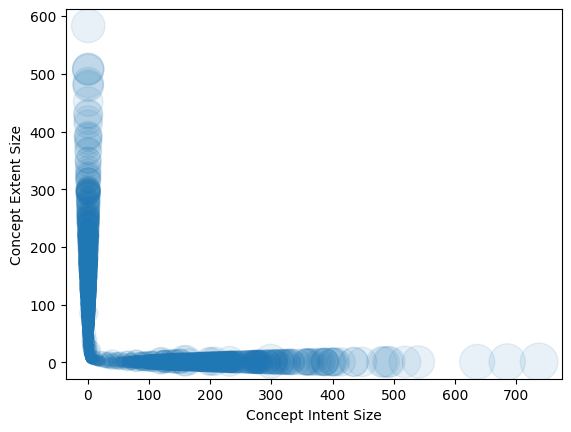

In [6]:
plt.scatter(intent_sizes, extent_sizes, s=concept_sizes, alpha=.1)
plt.xlabel("Concept Intent Size")
plt.ylabel("Concept Extent Size")
plt.show()

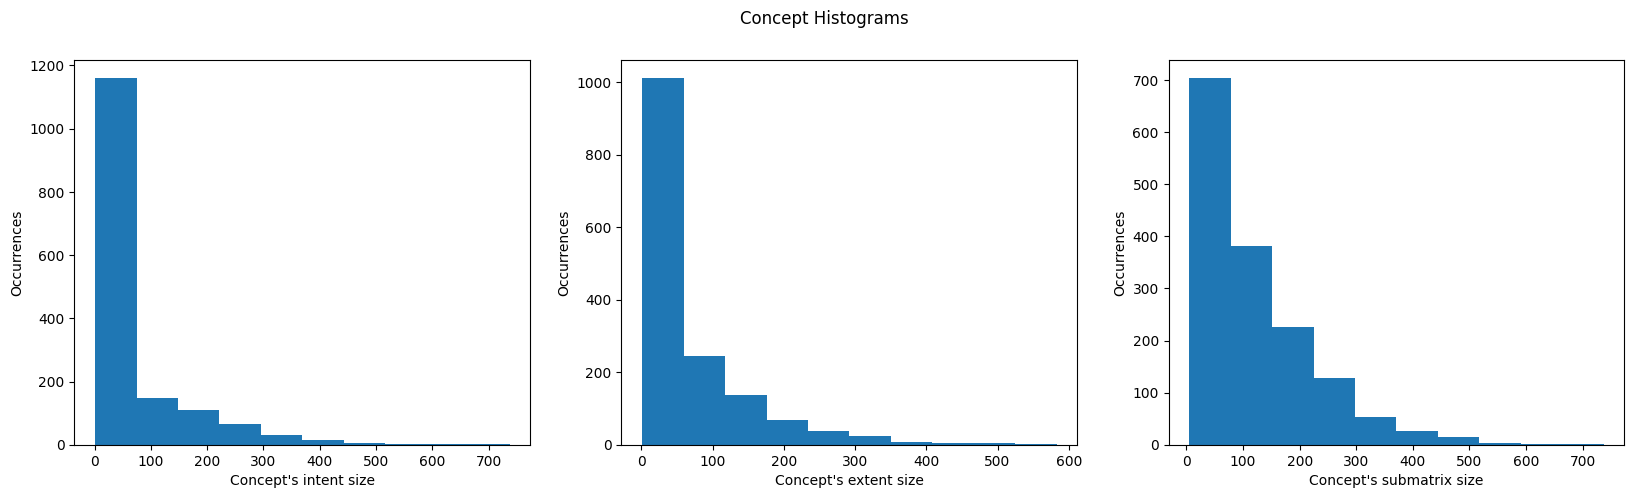

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Concept Histograms')

axs[0].hist(intent_sizes)
axs[0].set(xlabel='Concept\'s intent size', ylabel='Occurrences')

axs[1].hist(extent_sizes)
axs[1].set(xlabel='Concept\'s extent size', ylabel='Occurrences')

axs[2].hist(concept_sizes)
axs[2].set(xlabel='Concept\'s submatrix size', ylabel='Occurrences')

fig.show()


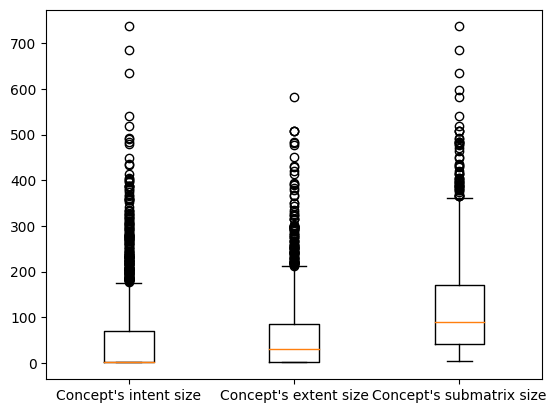

In [8]:
plt.boxplot([intent_sizes, extent_sizes, concept_sizes],
            labels=['Concept\'s intent size', 'Concept\'s extent size', 'Concept\'s submatrix size'])
plt.show()

In [9]:
# Access to factored matrices
print(algo.Af)
print(algo.Af.shape)

print(algo.Bf)
print(algo.Bf.shape)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]

(943, 1543)

[[False  True  True ... False False False]
 [ True  True False ...  True  True  True]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]

(1543, 1682)

In [10]:
# Access to similarity matrix
print(algo.sim)
print(algo.sim.shape)

[[1.         0.05120916 0.13266892 ... 0.18156826 0.06280743 0.06827887]
 [0.05120916 1.         0.17664045 ... 0.16116459 0.1672484  0.15909091]
 [0.13266892 0.17664045 1.         ... 0.19716855 0.01805395 0.13738702]
 ...
 [0.18156826 0.16116459 0.19716855 ... 1.         0.09883324 0.16116459]
 [0.06280743 0.1672484  0.01805395 ... 0.09883324 1.         0.0836242 ]
 [0.06827887 0.15909091 0.13738702 ... 0.16116459 0.0836242  1.        ]]

(943, 943)

In [11]:
# Generate similarity matrix from a vanilla KNN for comparison 
from surprise.prediction_algorithms import KNNBasic
knn_algo = KNNBasic(sim_options={"name": "cosine"})
knn_algo.fit(trainset)

print(knn_algo.sim)
print(knn_algo.sim.shape)

Computing the cosine similarity matrix...
Done computing similarity matrix.


[[1.         0.87278605 0.91226401 ... 0.86717176 0.84366149 0.9486833 ]
 [0.87278605 1.         0.84761034 ... 0.8782826  0.87552384 0.94252177]
 [0.91226401 0.84761034 1.         ... 0.88184244 1.         0.90116647]
 ...
 [0.86717176 0.8782826  0.88184244 ... 1.         0.89504128 0.93603858]
 [0.84366149 0.87552384 1.         ... 0.89504128 1.         0.98994949]
 [0.9486833  0.94252177 0.90116647 ... 0.93603858 0.98994949 1.        ]]

(943, 943)

In [12]:
from lib.BooleanMatrixBasedRecomenders import get_similarity_matrix, cosine_distance

similarity_matrix_on_original_dataset = get_similarity_matrix(algo.binary_dataset, cosine_distance)
similarity_delta = algo.sim - similarity_matrix_on_original_dataset

def flatten_similarity_matrix(matrix):
    similarities = []
    for i, _ in enumerate(matrix):
        for j, _ in enumerate(matrix):
            if i <= j:
                continue
            similarities.append(matrix[i,j])
    return similarities

original_dataset_similarities = flatten_similarity_matrix(similarity_matrix_on_original_dataset)
latent_dataset_similarities = flatten_similarity_matrix(algo.sim)
knn_similarities = flatten_similarity_matrix(knn_algo.sim)
similarity_deltas = flatten_similarity_matrix(similarity_delta)

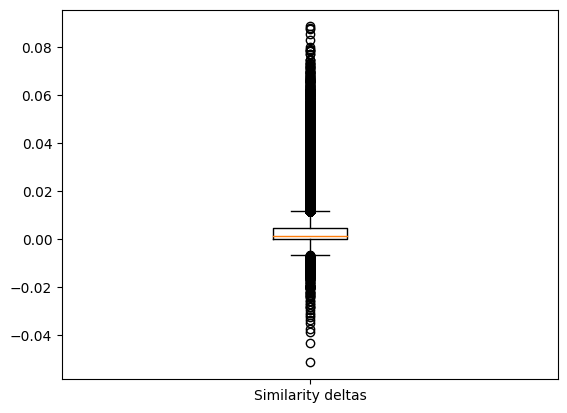

In [13]:
plt.boxplot([similarity_deltas], labels=['Similarity deltas'])
plt.show()

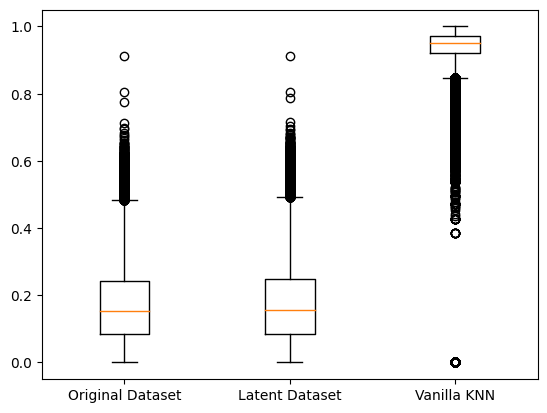

In [14]:
plt.boxplot([original_dataset_similarities, latent_dataset_similarities, knn_similarities], labels=['Original Dataset', 'Latent Dataset', 'Vanilla KNN'])
plt.show()

In [15]:
# Assert that factorization covers 100% of the original matrix
I = np.matmul(algo.Af, algo.Bf)
assert (I == algo.binary_dataset._binary_dataset).all()

In [16]:
algo_jaccard = FcaBmf(coverage=1, verbose=True)

In [17]:
# Generate some predictions
from surprise.model_selection import KFold

# Lets create a 80% train / 20% test ratio
kf = KFold(n_splits=5)
fold_generator = kf.split(dataset)
trainset, testset = next(fold_generator)

# algo.fit(trainset)
algo_jaccard.fit(trainset)
knn_algo.fit(trainset)


[FcaBmf] Generating binary dataset...
[FcaBmf] Generating binary dataset OK!
[FcaBmf] Resulting binary dataset is 943 rows x 1647 columns
[FcaBmf] Generating Formal Context...
[FcaBmf] Generating Formal Context OK
[FcaBmf] Generating Similarity Matrix...
[FcaBmf] Generating Similarity Matrix Ok
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [18]:
predictions_cosine = algo.test(testset)
predictions_jaccard = algo_jaccard.test(testset)
predictions_knn = knn_algo.test(testset)


In [20]:
# Overall quality of the predictions
from surprise.accuracy import mae, rmse

mae(predictions=predictions_cosine)
rmse(predictions=predictions_cosine)

mae(predictions=predictions_jaccard)
rmse(predictions=predictions_jaccard)

mae(predictions=predictions_knn)
rmse(predictions=predictions_knn)

MAE:  0.7241
RMSE: 0.9061
MAE:  0.8033
RMSE: 1.0070
MAE:  0.7969
RMSE: 1.0065


1.0064616608415888

In [14]:
for prediction in predictions_cosine[:10]:
    print(prediction)

Prediction(
    uid='855',
    iid='475',
    r_ui=4.0,
    est=4.016423894390228,
    details={
        'actual_k': 30,
        'neighbors_used': [
            ('884', 0.1777777777777778, 4.0),
            ('257', 0.13793103448275867, 5.0),
            ('449', 0.11428571428571432, 5.0),
            ('607', 0.11363636363636365, 4.0),
            ('829', 0.11290322580645162, 4.0),
            ('615', 0.08737864077669899, 4.0),
            ('773', 0.08633093525179858, 3.0),
            ('658', 0.0821917808219178, 4.0),
            ('299', 0.07207207207207211, 4.0),
            ('568', 0.0714285714285714, 4.0),
            ('239', 0.06666666666666665, 5.0),
            ('903', 0.05982905982905984, 4.0),
            ('232', 0.059523809523809534, 5.0),
            ('214', 0.05833333333333335, 5.0),
            ('305', 0.05759162303664922, 4.0),
            ('894', 0.05500000000000005, 3.0),
            ('361', 0.054545454545454564, 4.0),
            ('409', 0.053892215568862256, 4.0),
            ('498', 0.052631578947368474, 3.0),
            ('90', 0.051181102362204745, 3.0),
            ('382', 0.05084745762711862, 3.0),
            ('913', 0.050420168067226934, 4.0),
            ('617', 0.0490196078431373, 1.0),
            ('500', 0.048128342245989275, 5.0),
            ('207', 0.045685279187817285, 2.0),
            ('420', 0.0444444444444444, 4.0),
            ('269', 0.04330708661417326, 5.0),
            ('763', 0.04166666666666663, 4.0),
            ('154', 0.04081632653061229, 4.0),
            ('343', 0.04040404040404044, 5.0)
        ],
        'was_impossible': False
    }
)

Prediction(
    uid='586',
    iid='249',
    r_ui=2.0,
    est=3.2642971965857686,
    details={
        'actual_k': 30,
        'neighbors_used': [
            ('435', 0.24054054054054053, 4.0),
            ('332', 0.23555555555555552, 3.0),
            ('916', 0.23291925465838514, 3.0),
            ('682', 0.23262032085561501, 3.0),
            ('92', 0.23184357541899436, 3.0),
            ('198', 0.2290748898678414, 2.0),
            ('727', 0.22812500000000002, 2.0),
            ('301', 0.2206896551724138, 3.0),
            ('643', 0.217741935483871, 3.0),
            ('268', 0.21739130434782605, 4.0),
            ('715', 0.21621621621621623, 4.0),
            ('276', 0.21476510067114096, 4.0),
            ('291', 0.21405750798722045, 4.0),
            ('178', 0.21201413427561833, 3.0),
            ('648', 0.21140939597315433, 3.0),
            ('487', 0.21111111111111114, 1.0),
            ('130', 0.20547945205479456, 5.0),
            ('429', 0.20512820512820518, 4.0),
            ('497', 0.20462046204620465, 5.0),
            ('347', 0.20416666666666672, 5.0),
            ('521', 0.2028985507246377, 4.0),
            ('660', 0.20078740157480313, 2.0),
            ('216', 0.19024390243902434, 3.0),
            ('922', 0.18627450980392157, 3.0),
            ('407', 0.18560606060606055, 2.0),
            ('622', 0.18250950570342206, 5.0),
            ('62', 0.18081180811808117, 2.0),
            ('796', 0.1807909604519774, 1.0),
            ('1', 0.1785714285714286, 4.0),
            ('303', 0.17727272727272725, 4.0)
        ],
        'was_impossible': False
    }
)

Prediction(
    uid='243',
    iid='468',
    r_ui=3.0,
    est=3.252018397955172,
    details={
        'actual_k': 30,
        'neighbors_used': [
            ('6', 0.12682926829268293, 3.0),
            ('627', 0.11827956989247312, 2.0),
            ('406', 0.11688311688311692, 1.0),
            ('454', 0.11489361702127665, 3.0),
            ('716', 0.11284046692607008, 3.0),
            ('347', 0.11111111111111116, 2.0),
            ('588', 0.11009174311926606, 3.0),
            ('378', 0.10835913312693501, 5.0),
            ('201', 0.10746268656716418, 4.0),
            ('618', 0.10550458715596334, 3.0),
            ('207', 0.10480349344978168, 4.0),
            ('719', 0.10476190476190472, 3.0),
            ('593', 0.10465116279069764, 3.0),
            ('632', 0.10344827586206895, 3.0),
            ('577', 0.10152284263959388, 3.0),
            ('561', 0.10062893081761004, 1.0),
            ('59', 0.09943181818181823, 3.0),
            ('606', 0.0982142857142857, 4.0),
            ('474', 0.09333333333333338, 4.0),
            ('330', 0.09036144578313254, 5.0),
            ('429', 0.08967391304347827, 3.0),
            ('654', 0.0892857142857143, 4.0),
            ('505', 0.08904109589041098, 4.0),
            ('311', 0.08712121212121215, 4.0),
            ('188', 0.08666666666666667, 4.0),
            ('682', 0.08587257617728528, 5.0),
            ('280', 0.0852713178294574, 4.0),
            ('416', 0.08275862068965523, 5.0),
            ('293', 0.08108108108108103, 2.0),
            ('537', 0.07746478873239437, 2.0)
        ],
        'was_impossible': False
    }
)

Prediction(
    uid='1',
    iid='1',
    r_ui=5.0,
    est=3.9947319387151365,
    details={
        'actual_k': 30,
        'neighbors_used': [
            ('916', 0.27604166666666663, 4.0),
            ('327', 0.2666666666666667, 4.0),
            ('457', 0.2615803814713896, 4.0),
            ('864', 0.261455525606469, 5.0),
            ('59', 0.25917431192660545, 2.0),
            ('222', 0.25522041763341063, 4.0),
            ('339', 0.25144508670520227, 5.0),
            ('823', 0.250814332247557, 4.0),
            ('682', 0.25056433408577883, 4.0),
            ('301', 0.24860335195530725, 4.0),
            ('715', 0.24742268041237114, 5.0),
            ('293', 0.2458233890214797, 2.0),
            ('896', 0.24087591240875916, 4.0),
            ('178', 0.23863636363636365, 4.0),
            ('363', 0.23809523809523814, 2.0),
            ('305', 0.23795180722891562, 5.0),
            ('561', 0.23671497584541068, 2.0),
            ('94', 0.23555555555555552, 4.0),
            ('303', 0.2343434343434343, 5.0),
            ('95', 0.2343324250681199, 5.0),
            ('387', 0.2338709677419355, 4.0),
            ('308', 0.23230088495575218, 4.0),
            ('194', 0.23177083333333337, 4.0),
            ('406', 0.23114355231143557, 4.0),
            ('727', 0.23037974683544304, 3.0),
            ('276', 0.23017408123791105, 5.0),
            ('805', 0.22928176795580113, 4.0),
            ('881', 0.22841225626740946, 4.0),
            ('343', 0.22781065088757402, 5.0),
            ('416', 0.2267441860465116, 5.0)
        ],
        'was_impossible': False
    }
)

Prediction(
    uid='819',
    iid='245',
    r_ui=3.0,
    est=3.183470939496567,
    details={
        'actual_k': 30,
        'neighbors_used': [
            ('656', 0.21212121212121215, 1.0),
            ('574', 0.18867924528301883, 5.0),
            ('809', 0.1875, 3.0),
            ('140', 0.18181818181818177, 3.0),
            ('146', 0.17948717948717952, 5.0),
            ('775', 0.17500000000000004, 3.0),
            ('920', 0.1707317073170732, 2.0),
            ('171', 0.1578947368421053, 3.0),
            ('40', 0.15217391304347827, 3.0),
            ('570', 0.1428571428571429, 1.0),
            ('427', 0.13953488372093026, 5.0),
            ('353', 0.13888888888888884, 4.0),
            ('808', 0.13888888888888884, 4.0),
            ('113', 0.13793103448275867, 3.0),
            ('173', 0.13725490196078427, 4.0),
            ('687', 0.1351351351351351, 3.0),
            ('818', 0.1351351351351351, 4.0),
            ('112', 0.12962962962962965, 4.0),
            ('133', 0.125, 3.0),
            ('3', 0.125, 1.0),
            ('485', 0.12195121951219512, 3.0),
            ('750', 0.11904761904761907, 3.0),
            ('433', 0.11764705882352944, 3.0),
            ('104', 0.11702127659574468, 2.0),
            ('509', 0.11363636363636365, 2.0),
            ('834', 0.11290322580645162, 4.0),
            ('423', 0.11267605633802813, 4.0),
            ('578', 0.11111111111111116, 3.0),
            ('803', 0.10869565217391308, 4.0),
            ('446', 0.10869565217391308, 4.0)
        ],
        'was_impossible': False
    }
)

Prediction(
    uid='345',
    iid='1221',
    r_ui=3.0,
    est=3.5391632756513887,
    details={
        'actual_k': 28,
        'neighbors_used': [
            ('416', 0.25210084033613445, 5.0),
            ('593', 0.22093023255813948, 3.0),
            ('457', 0.2136752136752137, 4.0),
            ('711', 0.20983606557377055, 4.0),
            ('655', 0.20973154362416102, 3.0),
            ('393', 0.20171673819742486, 3.0),
            ('450', 0.19961977186311786, 5.0),
            ('682', 0.1967592592592593, 3.0),
            ('618', 0.196078431372549, 2.0),
            ('174', 0.1934306569343066, 5.0),
            ('276', 0.1884920634920635, 3.0),
            ('280', 0.18768328445747806, 5.0),
            ('314', 0.1861861861861862, 3.0),
            ('311', 0.1805157593123209, 4.0),
            ('95', 0.17183098591549295, 4.0),
            ('224', 0.16602316602316602, 3.0),
            ('896', 0.1650246305418719, 2.0),
            ('608', 0.16083916083916083, 2.0),
            ('532', 0.1568627450980392, 5.0),
            ('643', 0.1548387096774193, 3.0),
            ('478', 0.1440329218106996, 2.0),
            ('885', 0.14166666666666672, 3.0),
            ('295', 0.13666666666666671, 5.0),
            ('159', 0.13469387755102036, 5.0),
            ('405', 0.11676646706586824, 1.0),
            ('694', 0.1149825783972126, 3.0),
            ('712', 0.1030927835051546, 4.0),
            ('942', 0.07531380753138073, 4.0)
        ],
        'was_impossible': False
    }
)

Prediction(
    uid='545',
    iid='423',
    r_ui=4.0,
    est=3.543340841941778,
    details={
        'actual_k': 30,
        'neighbors_used': [
            ('290', 0.2984293193717278, 5.0),
            ('56', 0.2687224669603524, 5.0),
            ('757', 0.2596153846153846, 3.0),
            ('536', 0.2571428571428571, 4.0),
            ('727', 0.2524271844660194, 3.0),
            ('774', 0.2520661157024794, 1.0),
            ('738', 0.25, 4.0),
            ('653', 0.24822695035460995, 2.0),
            ('497', 0.2465277777777778, 3.0),
            ('648', 0.24561403508771928, 4.0),
            ('267', 0.24336283185840712, 3.0),
            ('7', 0.24301675977653636, 5.0),
            ('407', 0.24291497975708498, 4.0),
            ('109', 0.2421875, 4.0),
            ('650', 0.23899371069182385, 3.0),
            ('943', 0.23502304147465436, 3.0),
            ('399', 0.234375, 3.0),
            ('373', 0.23320158102766797, 2.0),
            ('326', 0.23175965665236054, 3.0),
            ('709', 0.22959183673469385, 3.0),
            ('472', 0.22909090909090912, 5.0),
            ('346', 0.22881355932203384, 4.0),
            ('275', 0.22839506172839508, 4.0),
            ('417', 0.2271386430678466, 4.0),
            ('749', 0.22666666666666668, 4.0),
            ('881', 0.22580645161290325, 4.0),
            ('313', 0.2246376811594203, 4.0),
            ('897', 0.22368421052631582, 5.0),
            ('194', 0.2222222222222222, 3.0),
            ('268', 0.2215189873417721, 2.0)
        ],
        'was_impossible': False
    }
)

Prediction(
    uid='315',
    iid='673',
    r_ui=4.0,
    est=3.4057620591886795,
    details={
        'actual_k': 30,
        'neighbors_used': [
            ('361', 0.176056338028169, 4.0),
            ('664', 0.17318435754189943, 3.0),
            ('96', 0.15841584158415845, 4.0),
            ('198', 0.15053763440860213, 3.0),
            ('833', 0.14859437751004012, 4.0),
            ('561', 0.14193548387096777, 3.0),
            ('313', 0.13414634146341464, 4.0),
            ('650', 0.1317567567567568, 3.0),
            ('864', 0.13138686131386856, 3.0),
            ('308', 0.13031161473087816, 4.0),
            ('577', 0.12755102040816324, 3.0),
            ('645', 0.12751677852348997, 3.0),
            ('533', 0.1260162601626016, 3.0),
            ('269', 0.1245551601423488, 4.0),
            ('774', 0.12442396313364057, 2.0),
            ('566', 0.12426035502958577, 4.0),
            ('230', 0.12422360248447206, 3.0),
            ('363', 0.12374581939799334, 2.0),
            ('346', 0.12135922330097082, 3.0),
            ('643', 0.11792452830188682, 4.0),
            ('312', 0.11764705882352944, 5.0),
            ('457', 0.11721611721611724, 4.0),
            ('897', 0.11675126903553301, 5.0),
            ('608', 0.1164021164021164, 4.0),
            ('693', 0.11627906976744184, 4.0),
            ('385', 0.11439114391143912, 2.0),
            ('456', 0.11374407582938384, 3.0),
            ('62', 0.11353711790393017, 2.0),
            ('659', 0.11340206185567014, 4.0),
            ('429', 0.11263736263736268, 3.0)
        ],
        'was_impossible': False
    }
)

Prediction(
    uid='778',
    iid='1273',
    r_ui=3.0,
    est=2.582959237729651,
    details={
        'actual_k': 13,
        'neighbors_used': [
            ('453', 0.1490683229813664, 2.0),
            ('586', 0.1228070175438597, 4.0),
            ('757', 0.11111111111111116, 2.0),
            ('291', 0.10622710622710618, 2.0),
            ('788', 0.10526315789473684, 3.0),
            ('690', 0.10447761194029848, 3.0),
            ('130', 0.10030395136778114, 2.0),
            ('303', 0.09181141439205953, 2.0),
            ('268', 0.09027777777777779, 2.0),
            ('276', 0.08899297423887587, 2.0),
            ('655', 0.06340579710144922, 2.0),
            ('145', 0.06228373702422141, 5.0),
            ('372', 0.03883495145631066, 4.0)
        ],
        'was_impossible': False
    }
)

Prediction(
    uid='440',
    iid='258',
    r_ui=4.0,
    est=3.765586154810835,
    details={
        'actual_k': 30,
        'neighbors_used': [
            ('787', 0.16049382716049387, 5.0),
            ('772', 0.15517241379310343, 5.0),
            ('898', 0.1428571428571429, 3.0),
            ('784', 0.13636363636363635, 5.0),
            ('724', 0.13541666666666663, 4.0),
            ('40', 0.12903225806451613, 3.0),
            ('884', 0.12121212121212122, 5.0),
            ('61', 0.12, 4.0),
            ('529', 0.11940298507462688, 4.0),
            ('544', 0.1166666666666667, 3.0),
            ('351', 0.1159420289855072, 5.0),
            ('257', 0.11538461538461542, 3.0),
            ('894', 0.11538461538461542, 4.0),
            ('112', 0.11428571428571432, 3.0),
            ('206', 0.1097560975609756, 4.0),
            ('451', 0.10784313725490191, 4.0),
            ('229', 0.10526315789473684, 2.0),
            ('423', 0.10344827586206895, 5.0),
            ('427', 0.09999999999999998, 4.0),
            ('626', 0.09836065573770492, 4.0),
            ('404', 0.09722222222222221, 4.0),
            ('720', 0.09677419354838712, 4.0),
            ('570', 0.09615384615384615, 3.0),
            ('3', 0.09589041095890416, 2.0),
            ('410', 0.09433962264150941, 2.0),
            ('444', 0.09259259259259256, 3.0),
            ('143', 0.09259259259259256, 3.0),
            ('507', 0.09210526315789469, 4.0),
            ('856', 0.09090909090909094, 4.0),
            ('526', 0.0898876404494382, 3.0)
        ],
        'was_impossible': False
    }
)